# Gaussian XOR and Gaussian R-XOR Experiment

Import modules

In [1]:
import numpy as np

import functions.xor_rxor_functions as fn
from proglearn.sims import generate_gaussian_parity

Generate Gaussian XOR and R-XOR

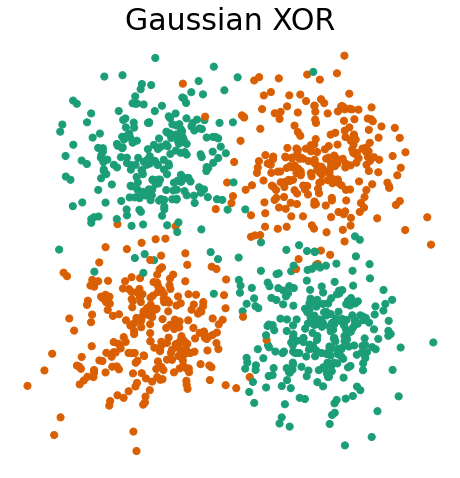

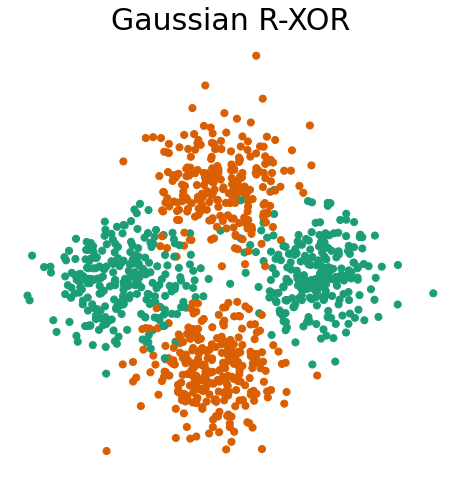

In [2]:
# call function to return gaussian xor and r-xor data:
X_xor, y_xor = generate_gaussian_parity(1000)
X_rxor, y_rxor = generate_gaussian_parity(1000, angle_params=np.pi/4)

X, Y = generate_gaussian_parity(750, angle_params=0)
Z, W = generate_gaussian_parity(1000, angle_params=np.pi/4)

# plot and format:
fn.plot_xor_rxor(X_xor, y_xor, 'Gaussian XOR')
fn.plot_xor_rxor(X_rxor, y_rxor, 'Gaussian R-XOR')

## Experiment

Declare hyperparameters:
- `mc_rep`: number of repetitions to run progressive learning algorithm
- `n_test`: number of xor/rxor data points in test set
- `n_trees`: number of trees
- `n_xor`: array containing number of xor data points fed to learner
- `n_rxor`: array containing number of rxor data points fed to learner

In [3]:
# define hyperparameters:
mc_rep = 100 # 1000 in paper experiment
n_test = 1000
n_trees = 10
n_xor = (100*np.arange(0.5, 7.25, step=0.25)).astype(int)
n_rxor = (100*np.arange(0.5, 7.50, step=0.25)).astype(int)

In [4]:
# running the experiment:

# create empty arrays for storing results
mean_error = np.zeros((6, len(n_xor)+len(n_rxor)))
std_error = np.zeros((6, len(n_xor)+len(n_rxor)))
mean_te = np.zeros((4, len(n_xor)+len(n_rxor)))
std_te = np.zeros((4, len(n_xor)+len(n_rxor)))

# run the experiment
mean_error, std_error, mean_te, std_te = fn.run(mc_rep, n_test, n_trees,n_xor,n_rxor, mean_error, std_error, mean_te, std_te);

## Results

C:\ProgramData\Anaconda3\envs\proglearn\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


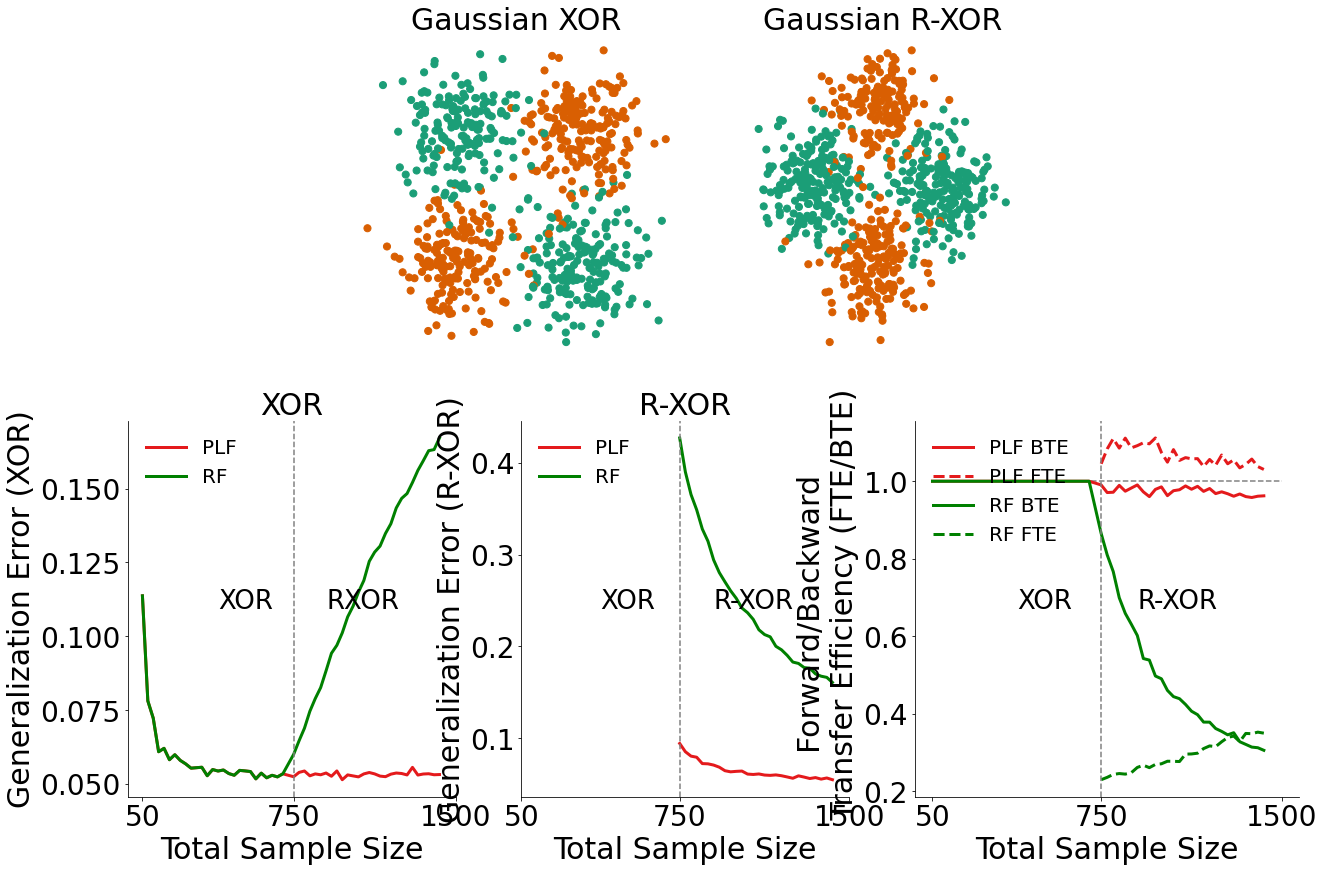

In [5]:
# plot data
fn.plot_error_and_eff(n_xor, n_rxor, mean_error, mean_te, 'XOR', 'RXOR')

## Various Angles vs BTE

Parameters
- `mc_rep`: number of repetitions to run progressive learning algorithm for
- `angle_sweep`: angles to test
- `task1_sample`: number of task 1 samples
- `task2_sample`: number of task 2 samples

In [6]:
angle_sweep = range(0,90,1)
task1_sample = 100
task2_sample = 100
mc_rep = 100

Run experiment

In [8]:
mean_te = fn.bte_v_angle(angle_sweep, task1_sample, task2_sample, mc_rep)

In [ ]:
fn.plot_bte_v_angle(mean_te)